In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("fruits 'n' veggies - booleanized.csv").set_index("fruit").dropna()

# these are the columns that we're trying to use to predict fruit v veggie
feature_columns = [ '>30 cal per 100g', 'over $1/pound', 'need to peel', 'green?',
       'keep in fridge', 'grows on a tree']

# data cleaning, converting Excel's `TRUE` to a Python `True`
for col in feature_columns:
    df[col] = df[col] == 'TRUE'

In [3]:

# split the dataset into test and train.
train_df, test_df  = train_test_split(df)
print("{} train records, {} test records".format(len(train_df), len(test_df)))

37 train records, 13 test records


In [4]:
from sklearn.ensemble import RandomForestClassifier

# create a very small random forest classifier with 3 trees.
model = RandomForestClassifier(n_estimators=3, max_depth=2)

# train the classifier with two arguments: the features, and the true fruit/veg label
model.fit(train_df[feature_columns], train_df['truth'])


RandomForestClassifier(max_depth=2, n_estimators=3)

In [5]:
# now that we've trained a model, let's generate predictions for our test set.
# note how we don't tell the model about the right answers (i.e. `test_df.truth` isn't written anywhere here.)
predictions = model.predict(test_df[feature_columns])


In [6]:
# let's see how we did!

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# calculate accuracy score
print("accuracy: {:.1%} ({}/{})".format(accuracy_score(test_df.truth, predictions), sum(test_df.truth == predictions), len(test_df)))
# and compare to a naive baseline of guessing the most common class for everything
print("baseline: {:.1%}".format(accuracy_score(test_df.truth, [train_df.truth.value_counts().index[0]] * len(test_df) )))

# show the results
pd.DataFrame({
        "fruit": test_df.index, 
        "truth": test_df.truth,
        "prediction": predictions,
        "correct?": test_df.truth == predictions
}).style.background_gradient(subset=["correct?"])

accuracy: 76.9% (10/13)
baseline: 46.2%


,fruit,truth,prediction,correct?
fruit,,,,
blueberry,blueberry,fruit,veg,False
onion,onion,veg,veg,True
lettuce,lettuce,veg,veg,True
plum,plum,fruit,fruit,True
avocado,avocado,veg,fruit,False
potato,potato,veg,veg,True
spinach,spinach,veg,veg,True
pineapple,pineapple,fruit,fruit,True
orange,orange,fruit,fruit,True


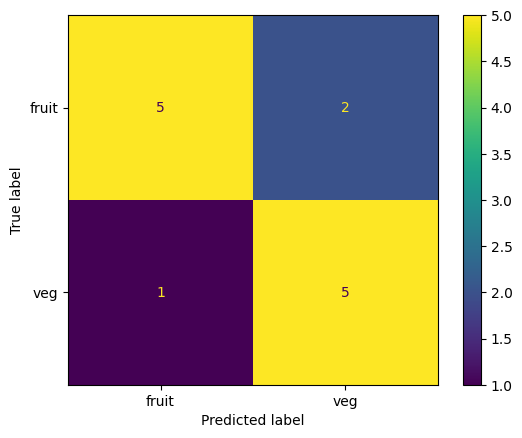

In [7]:
# draw a 'confusion matrix'
# which shows the right/wrong answers.
ConfusionMatrixDisplay.from_predictions(test_df.truth, pd.Series(predictions))

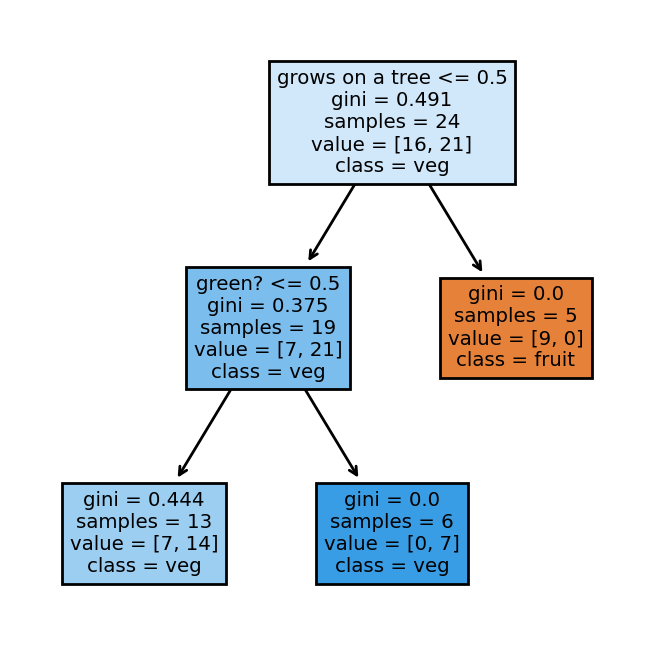

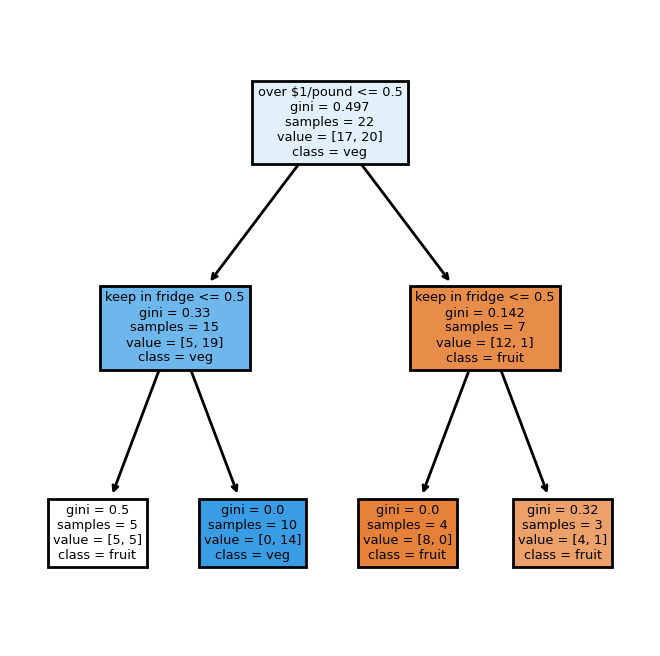

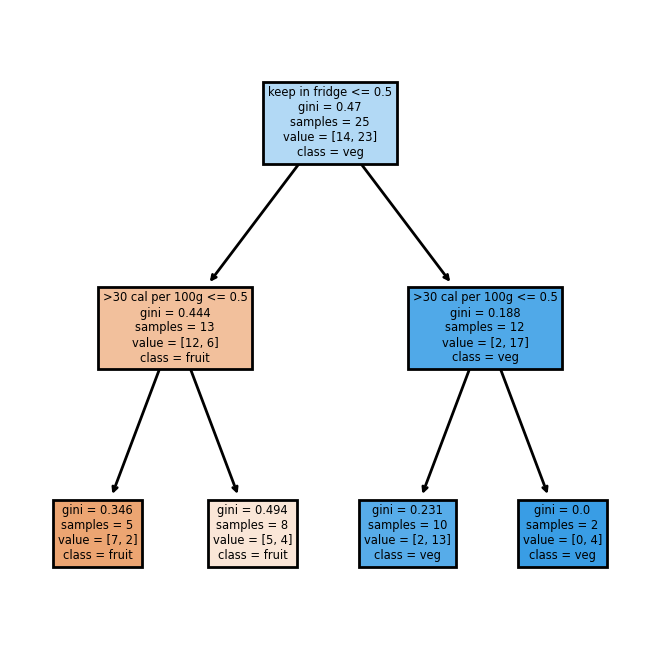

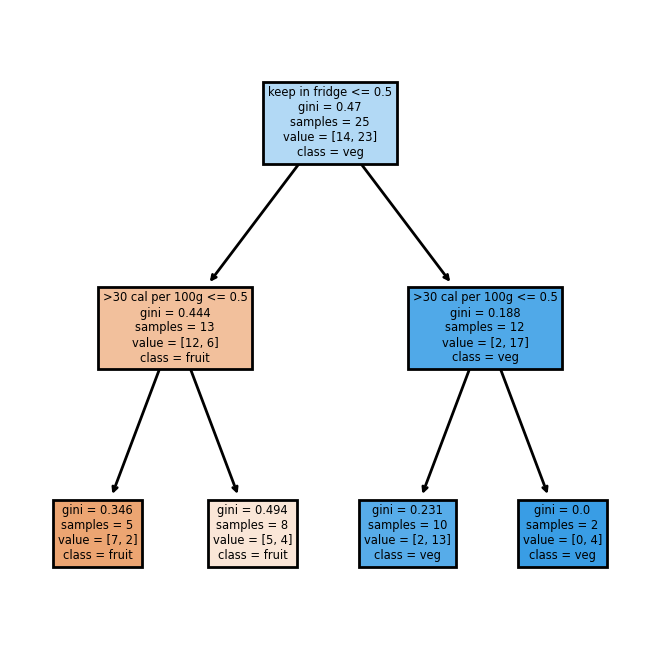

In [8]:
# let's look at the trees

from sklearn import tree as sklearn_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

for decision_tree in model.estimators_:
    sklearn_tree.plot_tree(decision_tree,
                   feature_names = feature_columns, 
                   class_names=['fruit', 'veg'],
                   filled = True);
    display(fig)